In [1]:
import seawater as gsw
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import netCDF4 as nc

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/TEMP150/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0295-09.TEMP.nc')
plotvar = data.variables['TEMP'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
temp = plotvar[0,:,500:2000]

In [3]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/SALT/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0295-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
salt = plotvar[0,:,500:2000]

In [4]:
dens0=gsw.dens0(salt,temp)-1000

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [5]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/TEMP150/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0295-09.TEMP.nc')
plotvar = data.variables['TEMP'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
temp = plotvar[20,:,500:2000]

In [6]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/SALT/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0295-09.SALT.nc')
plotvar = data.variables['SALT'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']
lont = lont[:,500:2000]
latt = latt[:,500:2000]
salt = plotvar[20,:,500:2000]

In [7]:
dens200=gsw.dens(salt,temp,200)-1000

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [8]:
plotvar=dens0-dens200

In [9]:
lont2 = lont[200:,700]
latt2 = latt[200:,700]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: No contour levels were found within the data range.


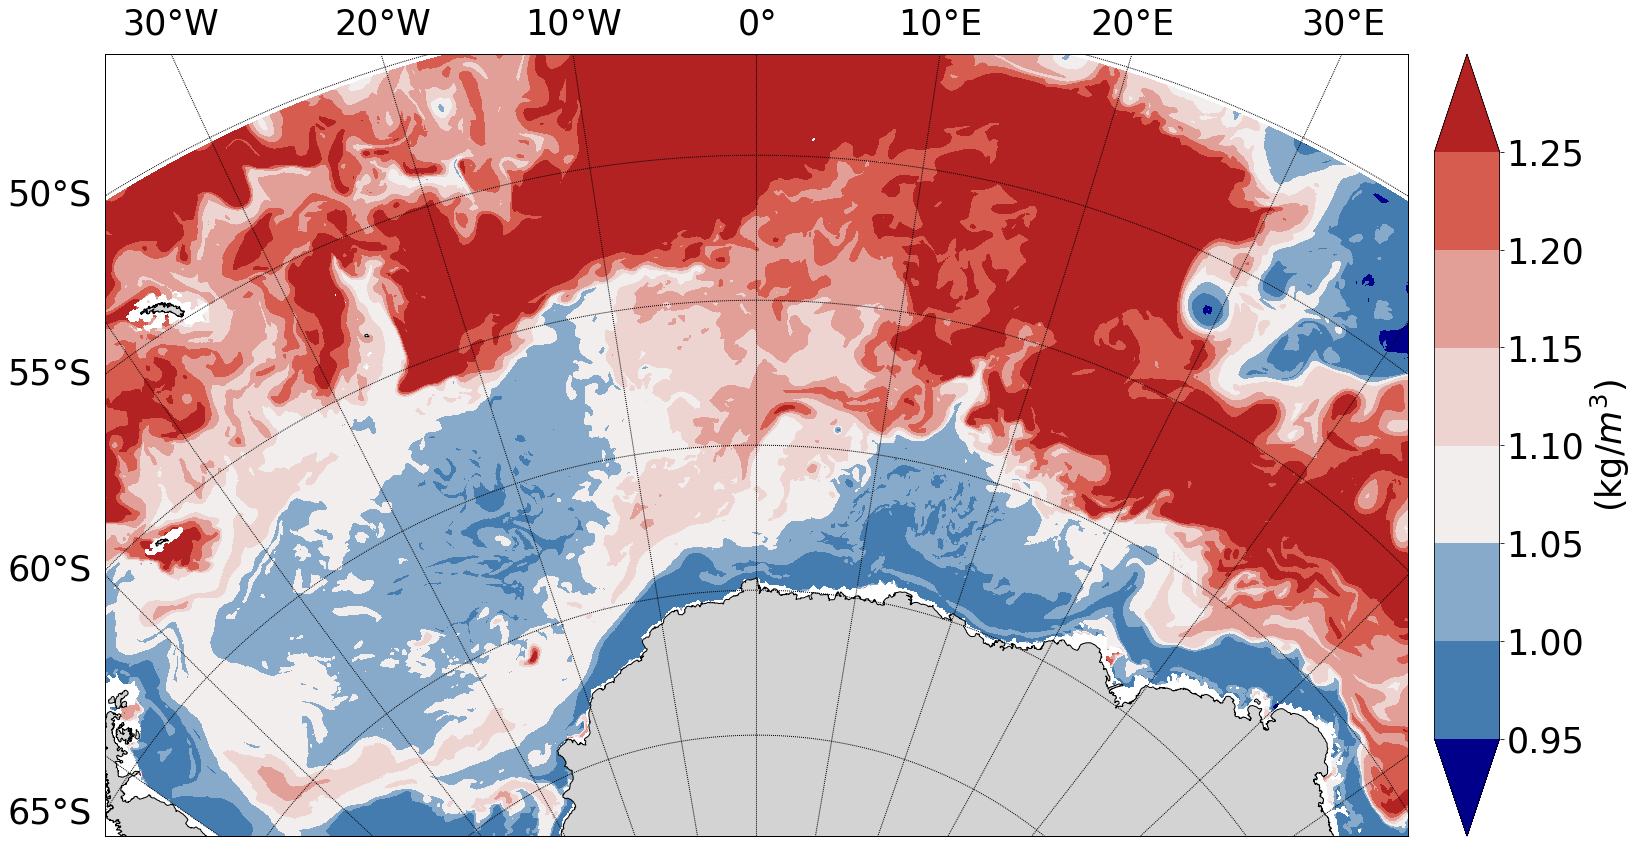

In [14]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0.95,1,1.05,1.1,1.15,1.2,1.25]

norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -65, lon_0 = 0,area_thresh = 100,\
                     width = 5000000,height = 3000000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)
x,y=map(lont,latt)
CP = map.contourf(x,y,-plotvar,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(kg/$m^3$)', **my_font)
#plt.xlabel("TIME 0167-09 (density difference between 0m and 200m)",**my_font)
plt.savefig("167-09.png",bbox_inches='tight')

In [11]:
np.nanmax(plotvar)

-0.914917

In [12]:
np.nanmin(plotvar)

-1.546875